# Project 1 - FIFA 2019 - Report and Codes

### Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import seaborn as sns

### Reading and cleaning data

In [3]:
df = pd.read_csv('data.csv')
#checking missing/null values
df.isnull().values.any()

True

In [4]:
#adjust format
list_columns_to_adj = ['Value','Wage','Release Clause']
df[list_columns_to_adj] = df[list_columns_to_adj].fillna('€'+'0'+'K')

In [5]:
def value_columns_adj (list_):
    for i in list_:
        df['i_order'] = ([x[-1] for x in df[i]])
        df['i_order'] = df['i_order'].replace({'M': float(1000000), 'K': float(1000),'0' :float(0)})
        df[i] = (pd.to_numeric([x[1:-1] for x in df[i]], errors='coerce')) * np.array(df['i_order'])
        df.drop("i_order", axis=1, inplace=True)
value_columns_adj(list_columns_to_adj)

In [6]:
#Clustering positions
def filter_(x):
    a = ['GK']
    b = ['LWB','RWB','LB','LCB','CB','RCB','RB']
    c = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
    d = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
    if x in a:
        return 'Goalkeeper'
    elif x in b:
        return 'Defenders'
    elif x in c:
        return 'Midfielder'
    elif x in d:
        return 'Attacker'
    else:
        return 'NaN'
df['SimplifiedPosition'] = df['Position'].apply(filter_)

In [7]:
#Save cleaned df
pickle.dump(df, open("df.pickle", "wb"))
df = pickle.load(open("df.pickle", "rb"))

In [8]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,SimplifiedPosition
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,Attacker
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,Attacker
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,Attacker
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Goalkeeper
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,Midfielder


### Data Analysis & Visualization

##### Distribution of the players per simplified position (cluster)

Text(0.5,1.08,'Distribution of the players per simplified position')

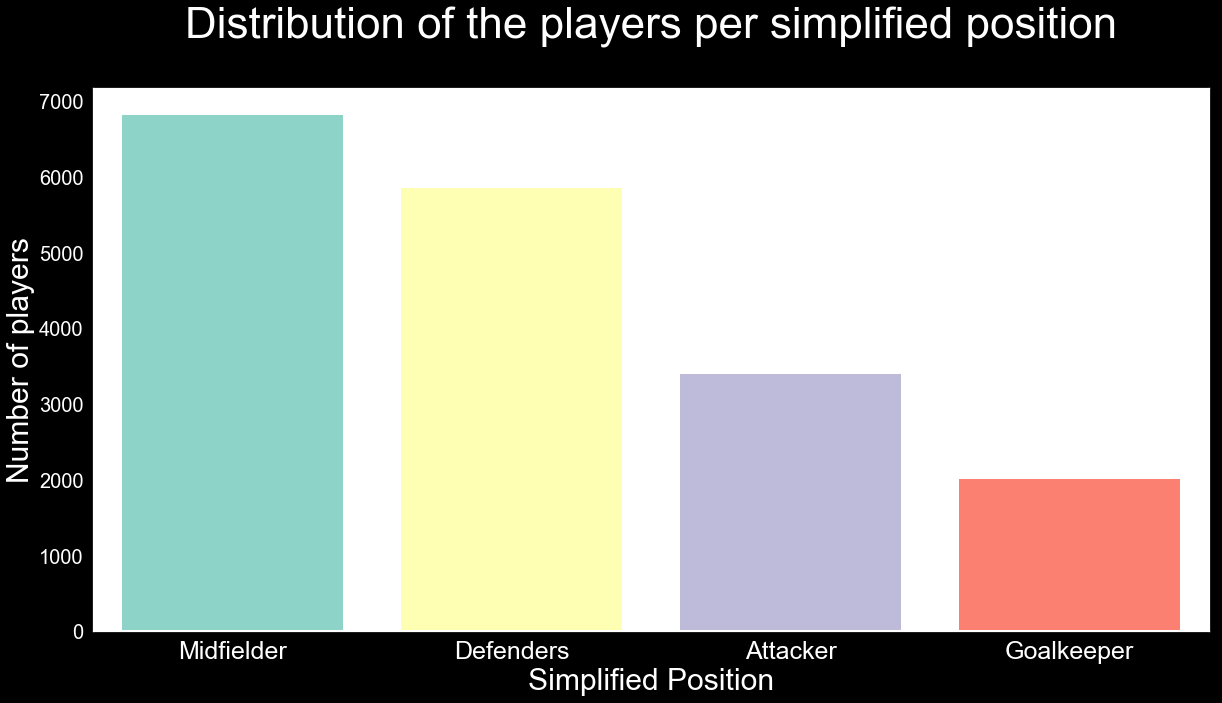

In [9]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})

df_temp = df[df['SimplifiedPosition'] != 'NaN']
t= sns.countplot(data=df_temp, 
                 x='SimplifiedPosition',
                 palette="Set3",
                 saturation =1,
                 linewidth=2,
                 order=df_temp['SimplifiedPosition'].value_counts().sort_values(ascending=False).index)

t.axes.xaxis.label.set_text("Simplified Position")
t.axes.yaxis.label.set_text("Number of players")
t.get_legend()
t.set_title("Distribution of the players per simplified position",fontsize = 44, color='white',y=1.08)

##### Top 10 players by wage

Text(0.5,1.08,'Top10 players by wage')

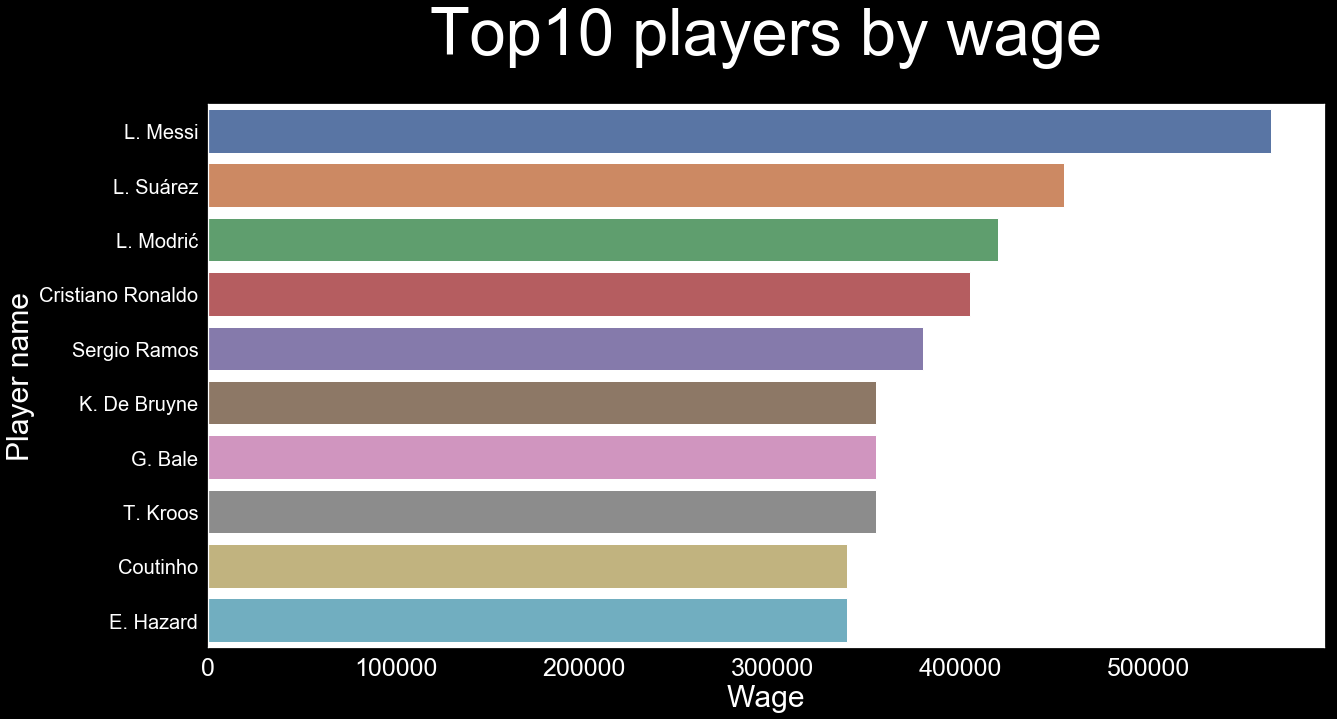

In [10]:
df_temp= df[['Wage','Name']].sort_values(by=['Wage'], ascending = False).head(10)

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})

u= sns.barplot(x= 'Wage', 
               y= 'Name', 
               data=df_temp)

u.axes.xaxis.label.set_text("Wage")
u.axes.yaxis.label.set_text("Player name")
u.get_legend()
u.set_title("Top10 players by wage",fontsize = 65, color='white',y=1.08)

#####  Top10 nations per value

Text(0.5,1.08,'TOP10 Nations per value')

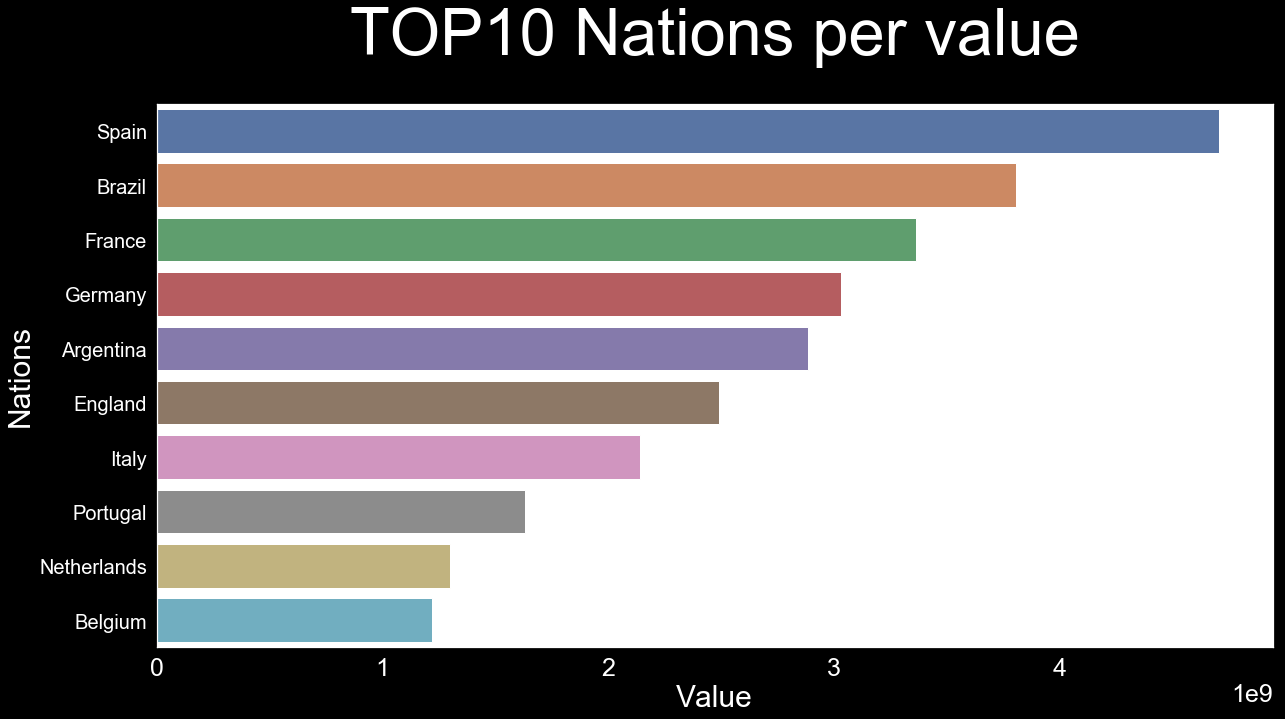

In [11]:
top10nations= df.groupby('Nationality').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p = sns.barplot(x= 'Value', y= 'Nationality', data=top10nations)

sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Nations")
p.get_legend()
p.set_title("TOP10 Nations per value",fontsize = 65, color='white',y=1.08)

#####  Top10 clubs by value

Text(0.5,1.08,'TOP10 clubs by value')

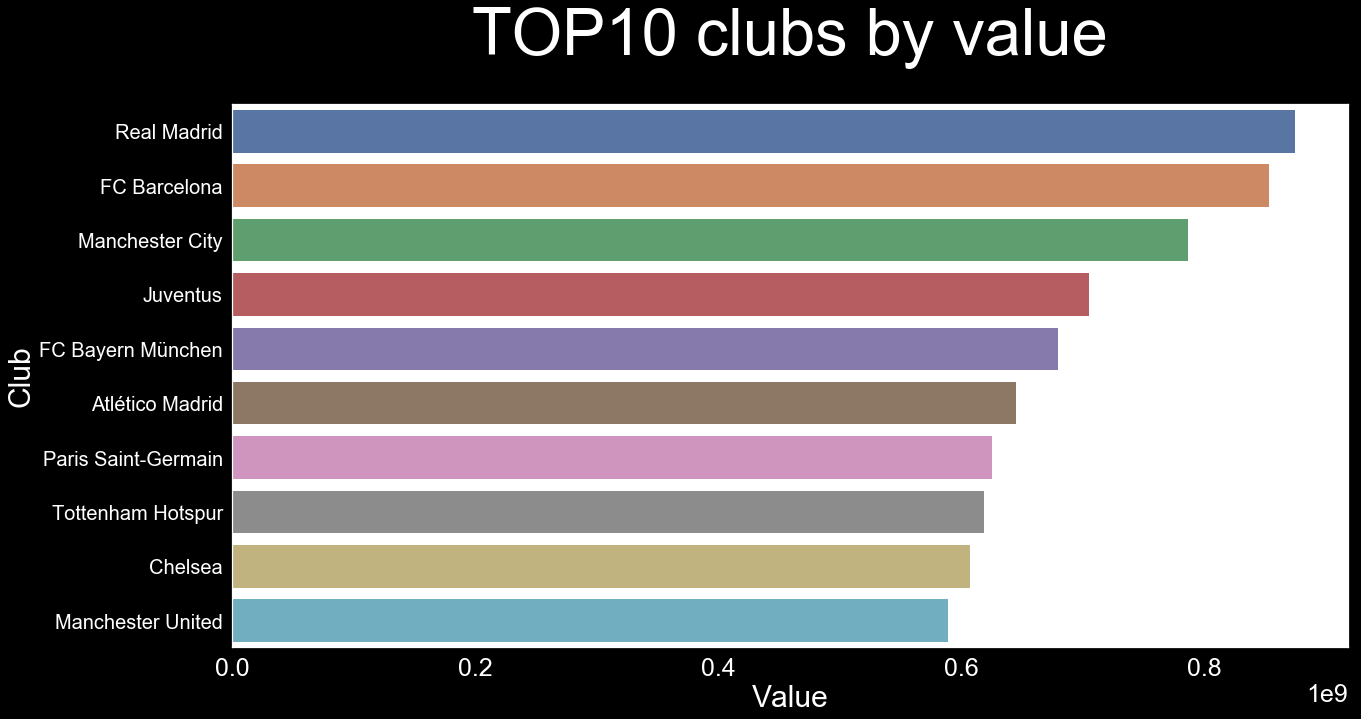

In [12]:
# top10 clubs by value
top10clubs= df.groupby('Club').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p= sns.barplot(x= 'Value', y= 'Club', data=top10clubs)

sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by value",fontsize = 65, color='white',y=1.08)


#####  Top10 clubs by players in the 90th percentile value

Text(0.5,1.08,'TOP10 clubs by players in the 90th percentile value')

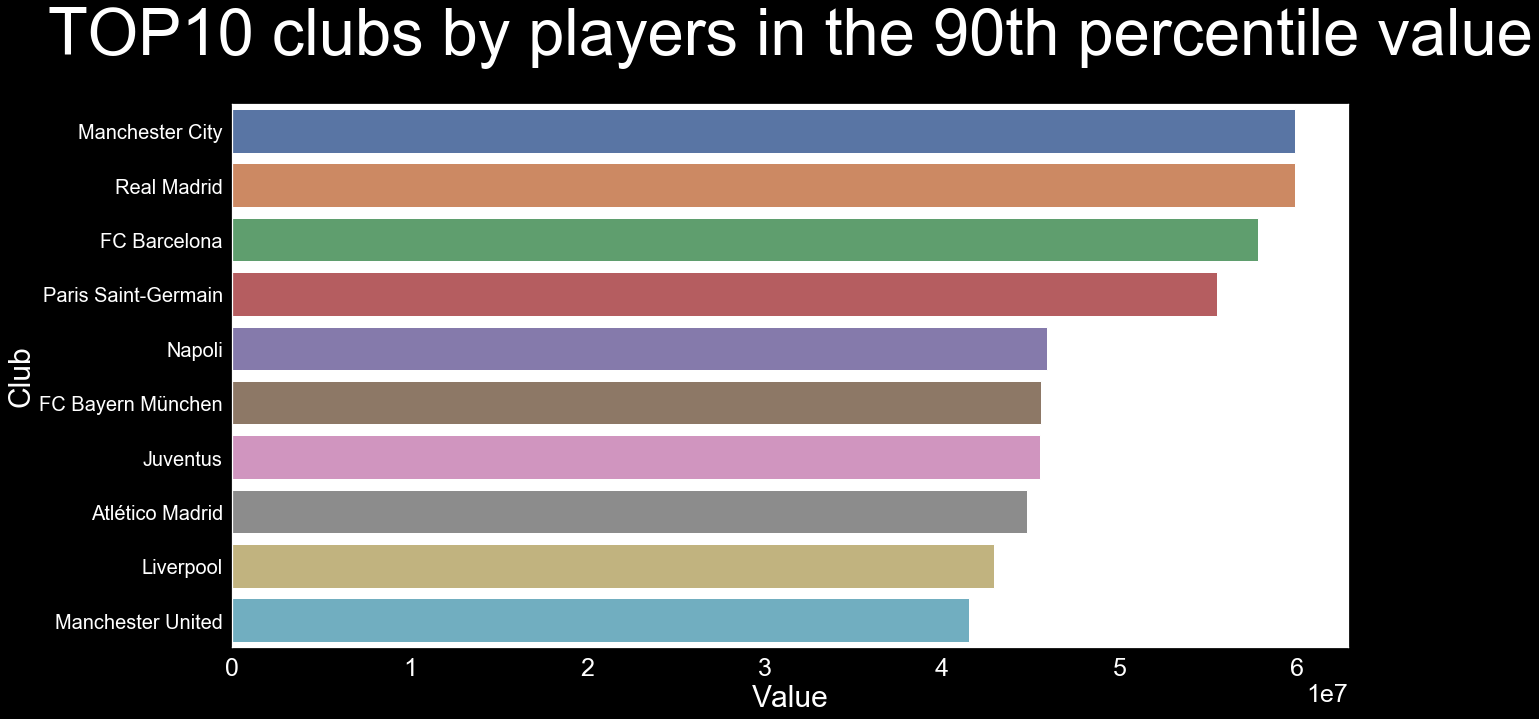

In [13]:
topclubs = df.groupby('Club')['Value'].apply(lambda g: g.quantile(.9)).sort_values(ascending=False).reset_index().head(10)
p = sns.barplot(x= 'Value', y= 'Club', data=topclubs)
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by players in the 90th percentile value",fontsize = 65, color='white',y=1.08)

#####  Top10 players per growth potential

Text(0.5,1.08,'TOP10 players per growth potential')

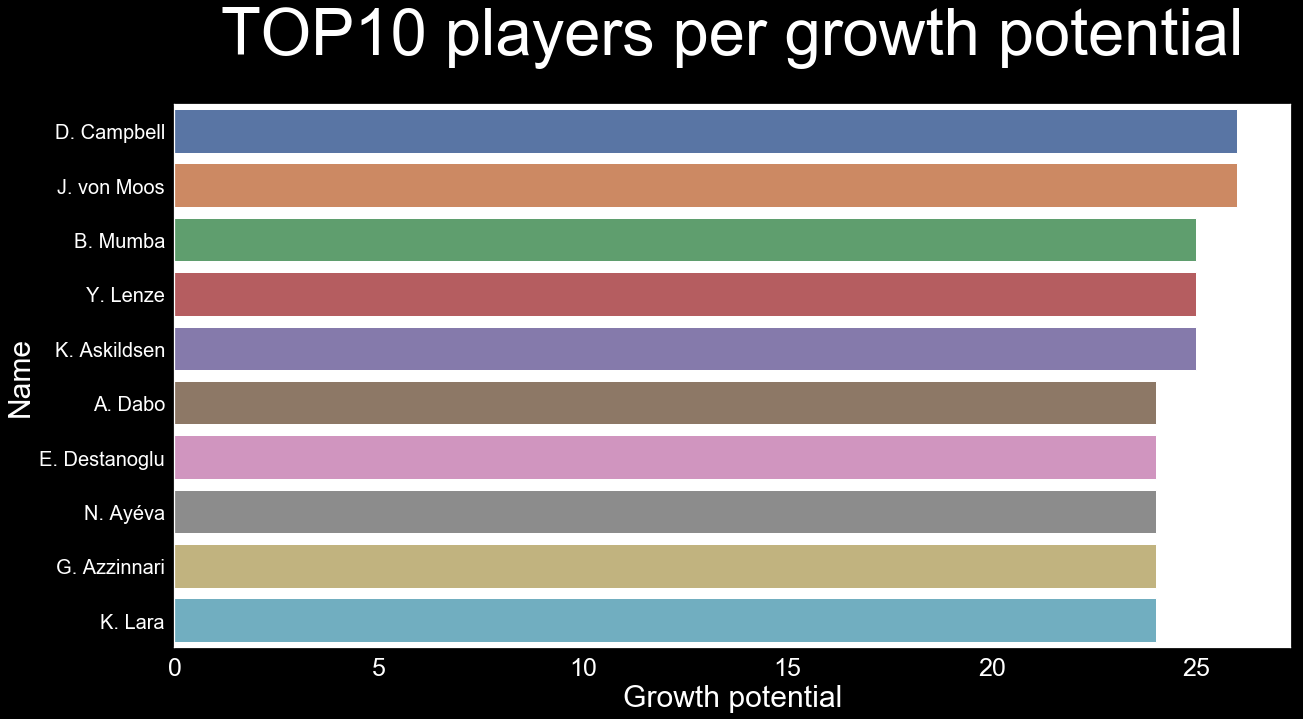

In [14]:
df['Growth Potential'] = abs(df['Potential']-df['Overall'])
toppot = df[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p= sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot)
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential",fontsize = 65, color='white',y=1.08)

#####  Top10 players per growth potential with potential over 90

Text(0.5,1.08,'TOP10 players per growth potential with potential over 90')

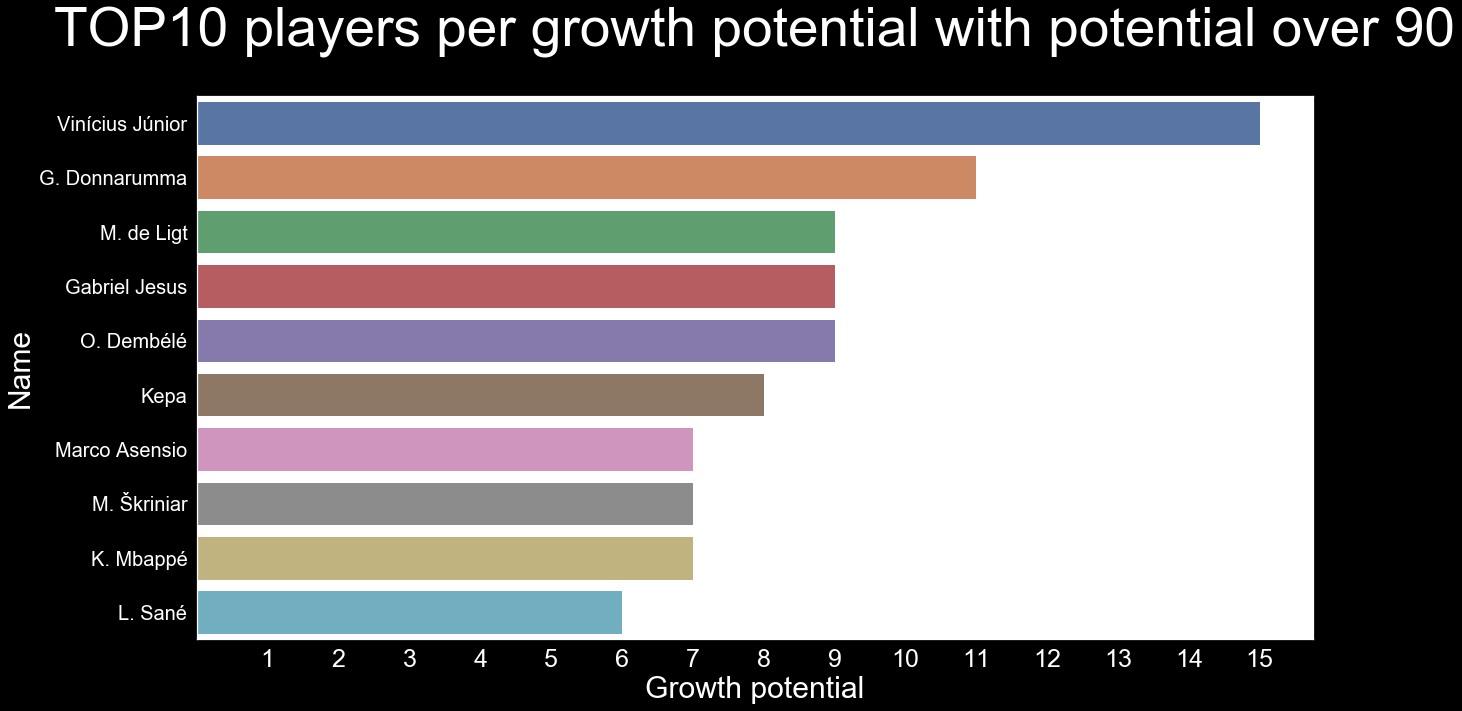

In [15]:
toppot_2 = df[df['Potential']>90]
toppot_2 = toppot_2[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p = sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot_2)
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
p.set_xticks(np.arange(1,toppot_2['Growth Potential'].max()+1,1))
p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential with potential over 90",fontsize = 55, color='white',y=1.08)

In [16]:
df = pickle.load(open("df.pickle", "rb"))

##### Player's Wage VS Value

Text(0.5,1.05,'Wage VS Value distribution')

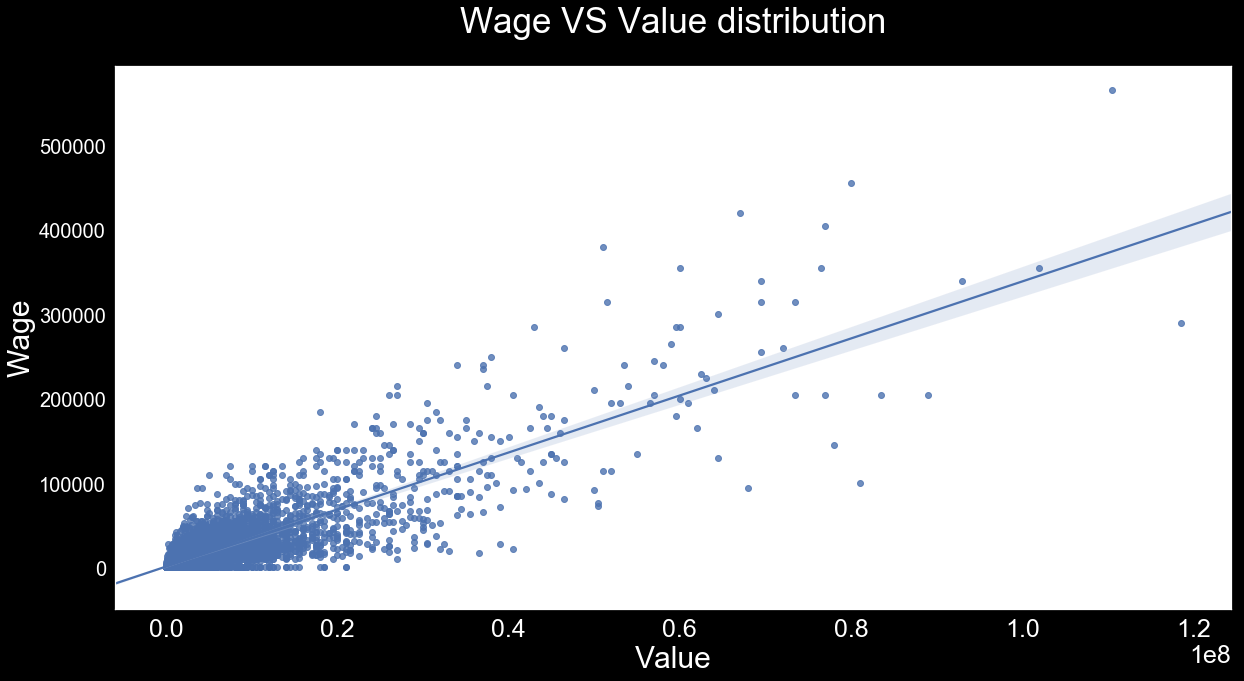

In [17]:
v = sns.regplot('Value', 'Wage', data= df) 
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
v.axes.xaxis.label.set_text("Value")
v.axes.yaxis.label.set_text("Wage")
v.get_legend()
v.set_title("Wage VS Value distribution",fontsize = 35, color='white',y=1.05)

#####  Overall performance VS Value

Text(0.5,1.05,'Overall performance VS Value')

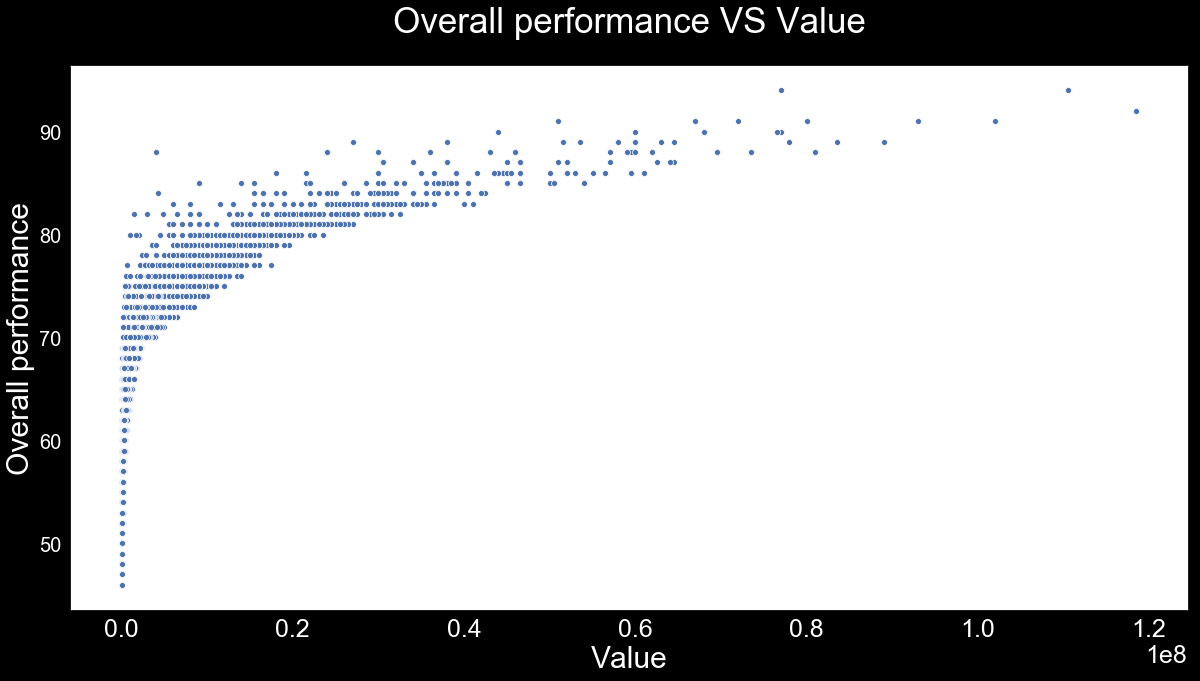

In [18]:
x = sns.scatterplot('Value', 'Overall', data= df) 
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
x.axes.xaxis.label.set_text("Value")
x.axes.yaxis.label.set_text("Overall performance")
x.get_legend()
x.set_title("Overall performance VS Value",fontsize = 35, color='white',y=1.05)

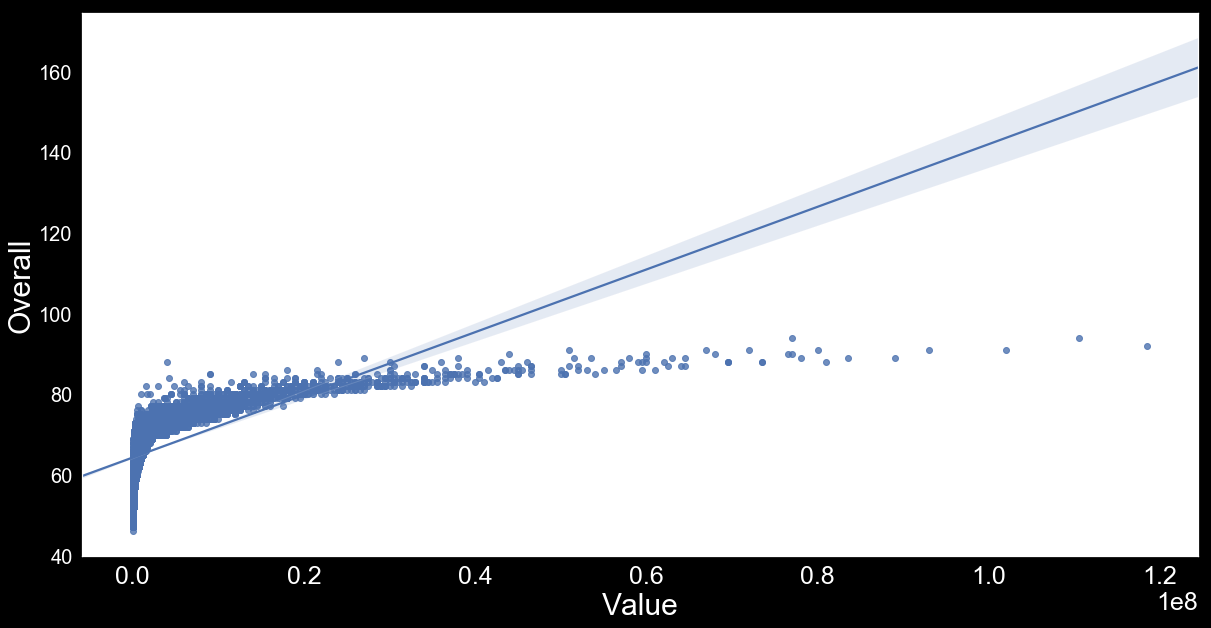

In [19]:
sns.regplot('Value', 'Overall', data= df) 

#####  Overall performance VS Wage

Text(0.5,1.05,'Overall performance VS Wage')

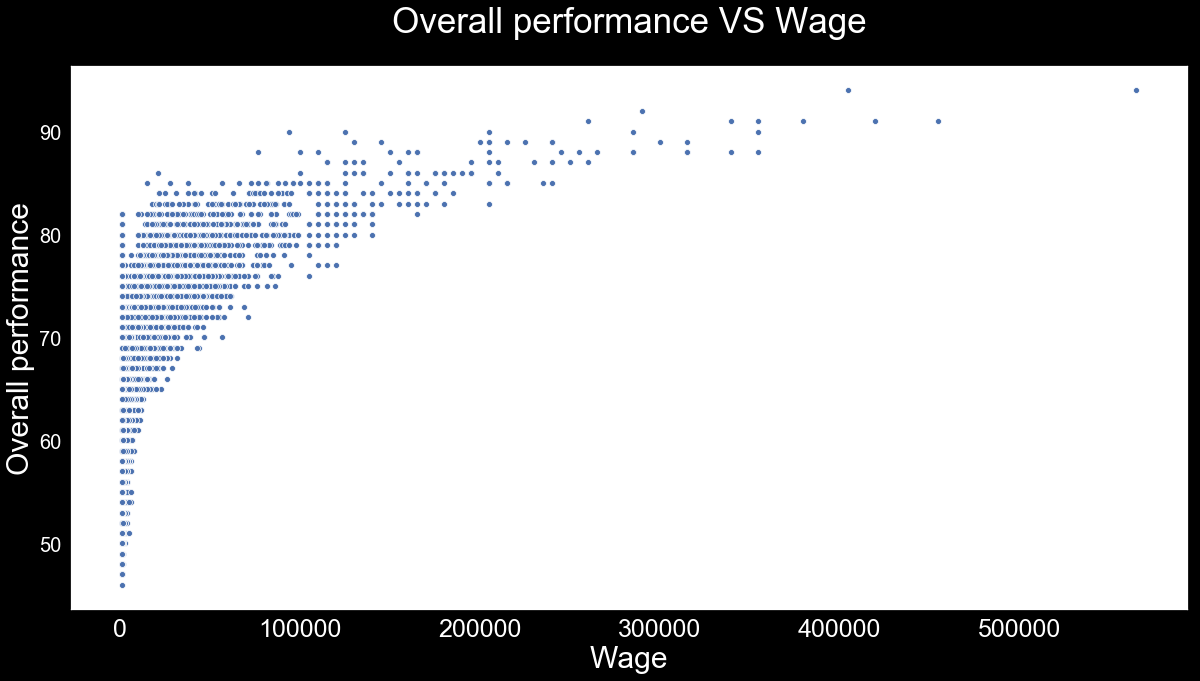

In [20]:
z = sns.scatterplot('Wage', 'Overall', data= df) 
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
z.axes.xaxis.label.set_text("Wage")
z.axes.yaxis.label.set_text("Overall performance")
z.get_legend()
z.set_title("Overall performance VS Wage",fontsize = 35, color='white',y=1.05)

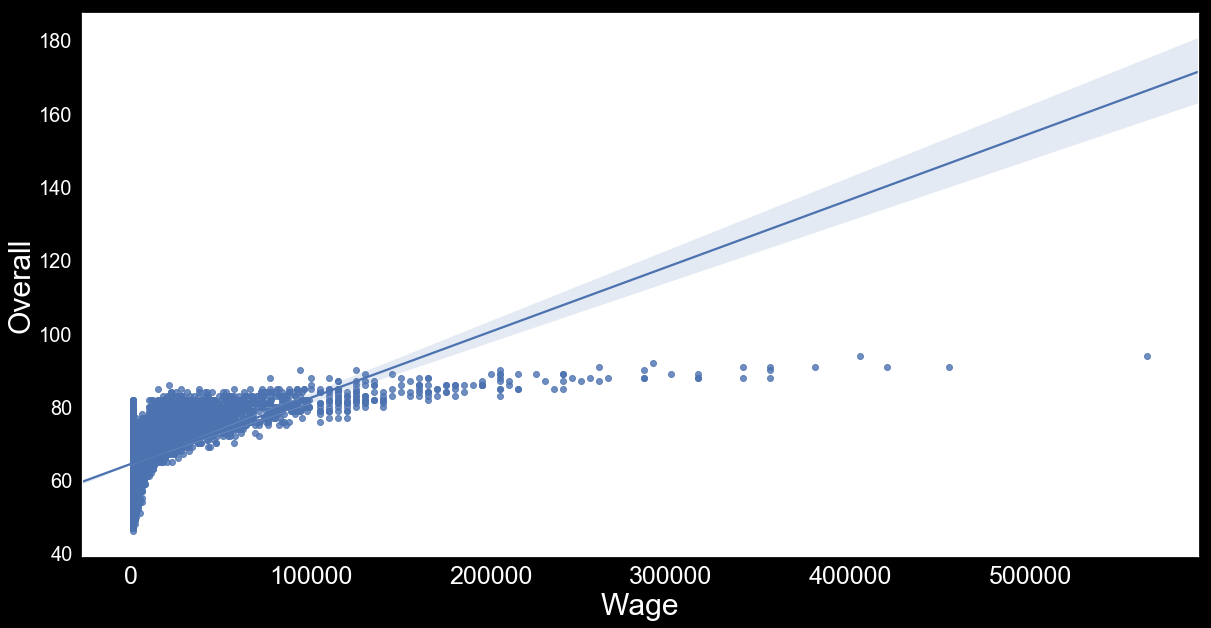

In [21]:
sns.regplot('Wage', 'Overall', data= df) 

#####  Player's Value VS Skill Moves

Text(0.5,1.05,"Player's Value VS Skill Moves")

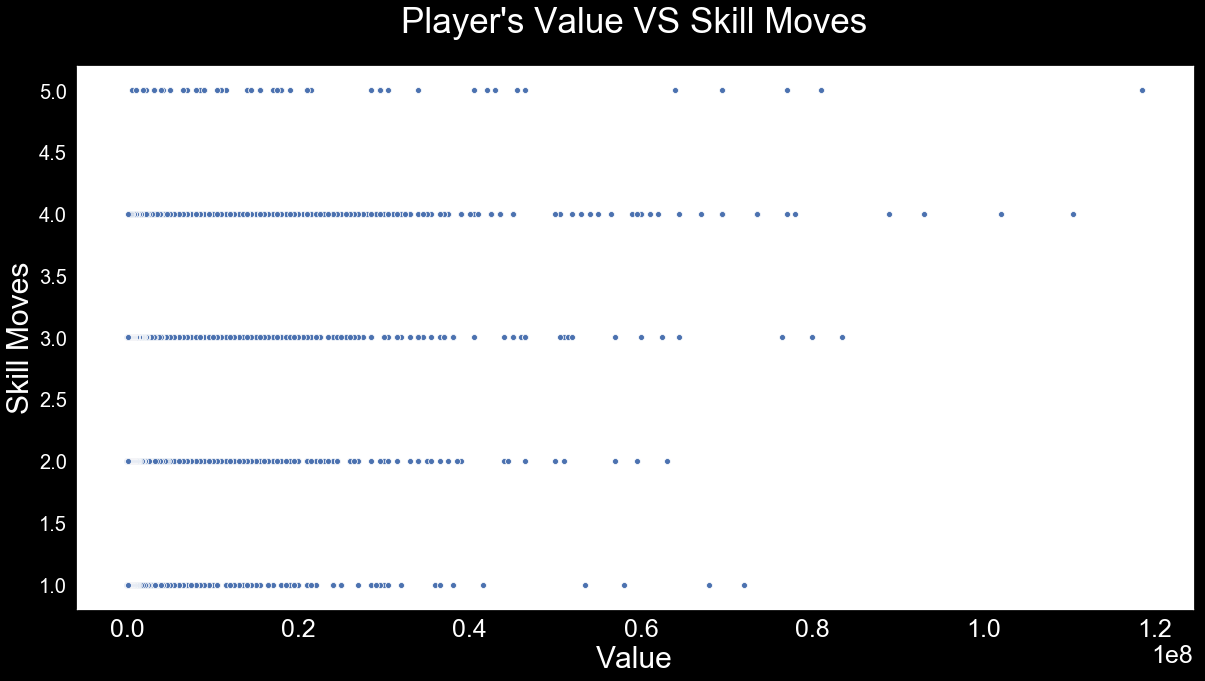

In [22]:
a = sns.scatterplot('Value', 'Skill Moves', data= df) 
sns.set(rc={"font.style":"normal","axes.facecolor":"white","figure.facecolor":"black","text.color":"white","xtick.color":"white","ytick.color":"white","axes.labelcolor":"white","axes.grid":False,'axes.labelsize':30,'figure.figsize':(20.0, 10.0),'xtick.labelsize':25,'ytick.labelsize':20})
a.axes.xaxis.label.set_text("Value")
a.axes.yaxis.label.set_text("Skill Moves")
a.get_legend()
a.set_title("Player's Value VS Skill Moves",fontsize = 35, color='white',y=1.05)

#####  Matrix Correlation

Text(0.5,1.05,'Matrix correlation')

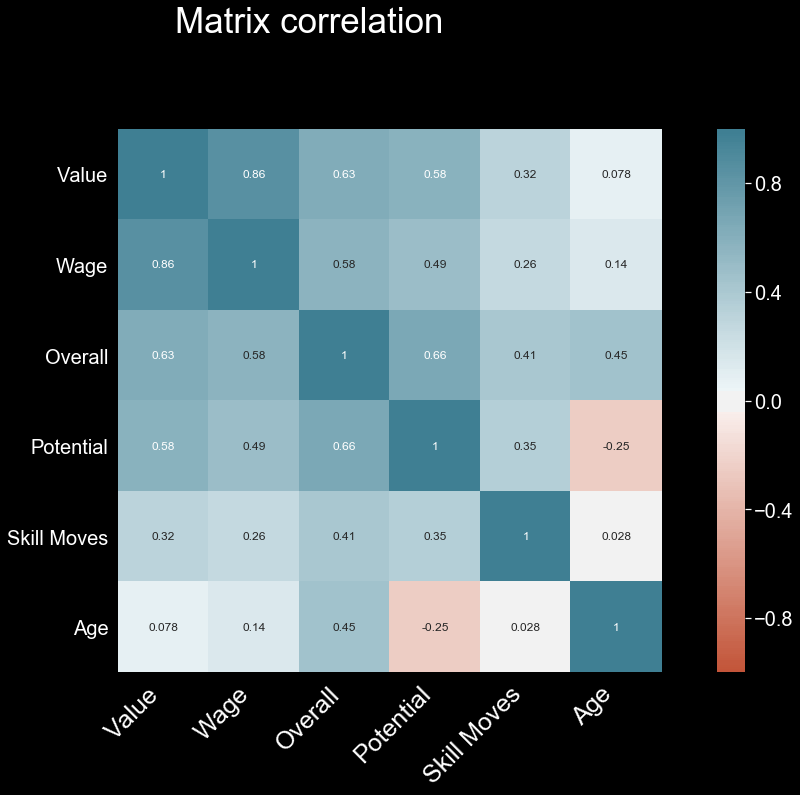

In [23]:
data = df[['Value','Wage','Overall','Potential','Skill Moves','Age']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

sns.set(rc={"font.style":"normal",
            "axes.facecolor":"black",
            "figure.facecolor":"black",
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':35,
            'figure.figsize':(20.0, 11.0),
            'xtick.labelsize':24,
            'ytick.labelsize':24,
            })

plt.suptitle("Matrix correlation",fontsize = 35, color='white',y=1.05)

###  Regression Analysis - Value vs. Overall performance, Wage, Potential, Skill moves, and Age

In [24]:
# Regression value(dependent var.), overall performance, wage, potential, skill moves and age as independent variables.
df = df.fillna(0)
x = np.array(df[['Overall','Wage','Potential','Skill Moves', 'Age']])
y = np.array(df['Value'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')
print ('median diff Value:',(y_pred-df['Value']).median())
print ('median diff Overall:',(y_pred-df['Overall']).median())

coefficient of determination: 0.7836334584782609
intercept: -9723019.622792415
slope: [ 2.36218320e+05  1.82036365e+02 -9.50909932e+03  1.01320772e+05
 -1.92860539e+05]
predicted response:
[ 1.08864800e+08  7.94545811e+07  5.94074954e+07 ... -1.95895894e+06
 -2.14231038e+06 -2.18566816e+06]
predicted response:
[ 1.08864800e+08  7.94545811e+07  5.94074954e+07 ... -1.95895894e+06
 -2.14231038e+06 -2.18566816e+06]
median diff Value: 96146.89623352326
median diff Overall: 1179331.1768911183
